In [1]:
import pandas as pd
import sqlite3
import requests
import numpy as np
import folium
import folium.plugins 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
con = sqlite3.connect('Campsite_data_4k.db')
query = ''' SELECT * FROM Venues'''
completed_venues = pd.read_sql_query(query,con).drop('index',axis=1)
query = ''' SELECT Campsite_Name, Latitude, Longitude FROM Sites WHERE Campsite_Name like '%RV%' AND Campsite_Name not like '%closed%'   '''
df_RV = pd.read_sql_query(query,con).drop_duplicates()
con.close()
Camp_sites_onehot = pd.get_dummies(completed_venues[['Venue_Category']], prefix="", prefix_sep="")
Camp_sites_onehot['Latitude'] = completed_venues['Latitude']
Camp_sites_onehot = Camp_sites_onehot[[Camp_sites_onehot.columns[-1]] + list(Camp_sites_onehot.columns[:-1])]
campsite_grouped = Camp_sites_onehot.groupby('Latitude').mean().reset_index()
campsite_grouped_clustering = campsite_grouped.drop('Latitude', 1)
campsite_grouped

,Latitude,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airfield,Airport,Airport Food Court,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,23.686356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,23.701440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,24.150010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016667,0.0
3,24.568251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,24.582099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,64.832576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4854,64.835300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4855,64.839585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4856,64.962006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [3]:
df_RV

,Campsite_Name,Latitude,Longitude
0,10 Acres Campground and RV Park,44.030277,-73.403468
1,1015 RV Park,26.145834,-97.958195
2,11 Bridges Campground and RV Park,51.415188,-112.632344
3,115 Creek Rest Area (no services),58.716979,-124.912576
4,1202 Motor Inn and RV Park,62.387044,-140.873463
...,...,...,...
5306,Zion RV and Campground,37.236637,-112.856060
5307,Zion West RV Park,37.231969,-113.364556
5308,Zion's Gate RV Resort,37.170192,-113.373832
5309,Zuni Village RV Park,35.224768,-114.014515


In [4]:
result_ss = []


range_for_test = list(range(1,12))

# run k-means clustering
for k in range_for_test:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(campsite_grouped_clustering)
    result_ss.append(kmeans.inertia_)

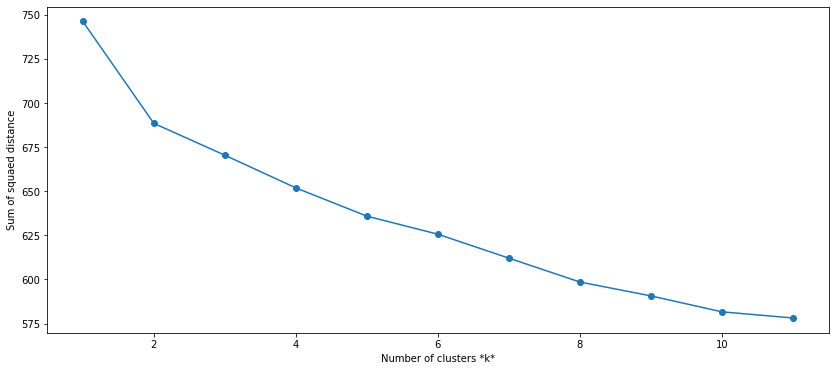

In [5]:
plt.figure(figsize=(14,6))
plt.plot(range_for_test,result_ss, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squaed distance')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(campsite_grouped_clustering)

In [7]:
kmeans.labels_[0:30]

array([2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       0, 3, 4, 4, 2, 4, 4, 4], dtype=int32)

In [8]:
campsite_grouped.insert(0, 'Kmeans_Cluster_Labels', kmeans.labels_)
df_RV = df_RV.reset_index().set_index('Latitude')
campsite_grouped = campsite_grouped.set_index('Latitude')

In [9]:
df_RV['Kmeans_Cluster_Labels'] = campsite_grouped['Kmeans_Cluster_Labels']
df_RV = df_RV.reset_index()
df_RV

,Latitude,index,Campsite_Name,Longitude,Kmeans_Cluster_Labels
0,44.030277,0,10 Acres Campground and RV Park,-73.403468,2.0
1,26.145834,1,1015 RV Park,-97.958195,4.0
2,51.415188,2,11 Bridges Campground and RV Park,-112.632344,0.0
3,58.716979,3,115 Creek Rest Area (no services),-124.912576,NaN
4,62.387044,4,1202 Motor Inn and RV Park,-140.873463,5.0
...,...,...,...,...,...
5306,37.236637,5306,Zion RV and Campground,-112.856060,NaN
5307,37.231969,5307,Zion West RV Park,-113.364556,NaN
5308,37.170192,5308,Zion's Gate RV Resort,-113.373832,NaN
5309,35.224768,5309,Zuni Village RV Park,-114.014515,NaN


In [10]:
df_RV.groupby('Kmeans_Cluster_Labels').count()

,Latitude,index,Campsite_Name,Longitude
Kmeans_Cluster_Labels,,,,
0.0,188,188,188,188
1.0,205,205,205,205
2.0,1832,1832,1832,1832
3.0,786,786,786,786
4.0,1554,1554,1554,1554
5.0,167,167,167,167
6.0,131,131,131,131


In [11]:
# create map of RV parks using latitude and longitude values
latitude = df_RV['Latitude'].mean()
longitude = df_RV['Longitude'].mean()
map_national_RV_parks_clusters = {}
for cluster in df_RV.groupby('Kmeans_Cluster_Labels').count().reset_index()['Kmeans_Cluster_Labels'].tolist():
    
    map_national_RV_parks_clusters[cluster] = folium.Map(location=[latitude, longitude], zoom_start=4)

    # add markers to map
    marker_cluster_clusters = {}
    marker_cluster_clusters[cluster] = folium.plugins.MarkerCluster().add_to(map_national_RV_parks_clusters[cluster])
    for lat, lng, name in zip(df_RV[df_RV['Kmeans_Cluster_Labels']==cluster]['Latitude'], df_RV[df_RV['Kmeans_Cluster_Labels']==cluster]['Longitude'], df_RV.reset_index()[df_RV['Kmeans_Cluster_Labels']==cluster]['Campsite_Name']):
        label = "<a  target='_blank' href='https://www.google.com/search?q={}'>{}</a>".format(name.replace(' ','%20'),name)
        #label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(marker_cluster_clusters[cluster])  

    map_national_RV_parks_clusters[cluster].save('Kmeans/Cluster {} from analysis.html'.format(cluster))

In [12]:
df_RV = df_RV.drop('index',axis=1)

In [13]:
con = sqlite3.connect('Campsite_data_4k.db')
df_RV.to_sql('Kmeans',con,if_exists='replace')
campsite_grouped.reset_index().to_sql('Kmeans_grouped',con,if_exists='replace')
con.close()

/home/theia/.local/lib/python3.6/site-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


## Let's make sure we can read the data

In [14]:
con = sqlite3.connect('Campsite_data_4k.db')
query = ''' SELECT * FROM Kmeans'''
df_RV_Kmeans = pd.read_sql_query(query,con).drop('index',axis=1)
query = ''' SELECT * FROM Kmeans_grouped'''
df_RV_Kmeans_grouped = pd.read_sql_query(query,con).drop('index',axis=1)
con.close()

In [15]:
df_RV_Kmeans

,Latitude,Campsite_Name,Longitude,Kmeans_Cluster_Labels
0,44.030277,10 Acres Campground and RV Park,-73.403468,2.0
1,26.145834,1015 RV Park,-97.958195,4.0
2,51.415188,11 Bridges Campground and RV Park,-112.632344,0.0
3,58.716979,115 Creek Rest Area (no services),-124.912576,NaN
4,62.387044,1202 Motor Inn and RV Park,-140.873463,5.0
...,...,...,...,...
5306,37.236637,Zion RV and Campground,-112.856060,NaN
5307,37.231969,Zion West RV Park,-113.364556,NaN
5308,37.170192,Zion's Gate RV Resort,-113.373832,NaN
5309,35.224768,Zuni Village RV Park,-114.014515,NaN


In [16]:
list(range(0,int(df_RV_Kmeans['Kmeans_Cluster_Labels'].max())+1,1))

[0, 1, 2, 3, 4, 5, 6]

## I will now seperate the dataFrame into seperate frames

In [17]:
df_Kmeans = {}
df_Kmeans_grouped = {}
df_Kmeans_stats = {}
for cluster in list(range(0,int(df_RV_Kmeans['Kmeans_Cluster_Labels'].max())+1,1)):
    df_Kmeans[cluster] = df_RV_Kmeans[df_RV_Kmeans['Kmeans_Cluster_Labels'] == cluster]
    df_Kmeans_grouped[cluster] = df_RV_Kmeans_grouped[df_RV_Kmeans_grouped['Kmeans_Cluster_Labels'] == cluster]
    cols = (df_Kmeans_grouped[cluster] != 0).any()
    try:
        df_Kmeans_grouped[cluster] = df_Kmeans_grouped[cluster][cols[cols].index]
    except:
        pass
    try:
        df_Kmeans_stats[cluster] = df_Kmeans_grouped[cluster].drop(['Kmeans_Cluster_Labels','Latitude'],1).describe().T.sort_values(by='mean', ascending=False)
    except:
        df_Kmeans_stats[cluster] = df_Kmeans_grouped[cluster].drop(['Latitude'],1).describe().T.sort_values(by='mean', ascending=False)
        #df_Kmeans_stats[cluster] = df_Kmeans_grouped[cluster].drop(['Kmeans_Cluster_Labels','Latitude'],1).describe().T.sort_values(by='mean', ascending=False)
    print("Cluster number: {}, cluster size: {}, number of venue types: {}".format(cluster, df_Kmeans_grouped[cluster].shape[0], df_Kmeans_grouped[cluster].shape[1]-1))

Cluster number: 0, cluster size: 188, number of venue types: 109
Cluster number: 1, cluster size: 205, number of venue types: 174
Cluster number: 2, cluster size: 1832, number of venue types: 552
Cluster number: 3, cluster size: 784, number of venue types: 361
Cluster number: 4, cluster size: 1551, number of venue types: 453
Cluster number: 5, cluster size: 167, number of venue types: 127
Cluster number: 6, cluster size: 131, number of venue types: 114


In [18]:
df_Kmeans[0]

,Latitude,Campsite_Name,Longitude,Kmeans_Cluster_Labels
2,51.415188,11 Bridges Campground and RV Park,-112.632344,0.0
59,50.062164,Abram Lake Resort and RV Park,-91.959962,0.0
204,34.303122,Arbuckle Acres RV Park,-97.081356,0.0
240,30.190590,Artesian RV Campground,-96.528617,0.0
286,60.028114,Baby Nugget RV Park,-129.081202,0.0
...,...,...,...,...
4803,46.445450,Tower Rock U-Fish RV Park,-121.885790,0.0
4825,40.857034,Trail In RV Campground,-122.349860,0.0
4864,51.435852,Triple Falls RV Park,-55.637020,0.0
4920,42.737399,Twin Pines RV Park,-108.647887,0.0


In [19]:
for i in df_Kmeans_stats:
    print("Group: {}, DF: {}".format(i,df_Kmeans_stats[i]))

Group: 0, DF:                      count      mean       std       min  25%  50%       75%  \
Campground           188.0  0.559319  0.233136  0.333333  0.4  0.5  0.666667   
Trail                188.0  0.027229  0.090409  0.000000  0.0  0.0  0.000000   
American Restaurant  188.0  0.021328  0.082560  0.000000  0.0  0.0  0.000000   
Lake                 188.0  0.016488  0.053470  0.000000  0.0  0.0  0.000000   
Bar                  188.0  0.014628  0.070860  0.000000  0.0  0.0  0.000000   
...                    ...       ...       ...       ...  ...  ...       ...   
Shopping Plaza       188.0  0.000665  0.009117  0.000000  0.0  0.0  0.000000   
Sandwich Place       188.0  0.000591  0.008104  0.000000  0.0  0.0  0.000000   
Lighthouse           188.0  0.000591  0.008104  0.000000  0.0  0.0  0.000000   
Travel & Transport   188.0  0.000591  0.008104  0.000000  0.0  0.0  0.000000   
Italian Restaurant   188.0  0.000532  0.007293  0.000000  0.0  0.0  0.000000   

                         

In [20]:
df_Kmeans_stats[0]

,count,mean,std,min,25%,50%,75%,max
Campground,188.0,0.559319,0.233136,0.333333,0.4,0.5,0.666667,1.000000
Trail,188.0,0.027229,0.090409,0.000000,0.0,0.0,0.000000,0.666667
American Restaurant,188.0,0.021328,0.082560,0.000000,0.0,0.0,0.000000,0.500000
Lake,188.0,0.016488,0.053470,0.000000,0.0,0.0,0.000000,0.250000
Bar,188.0,0.014628,0.070860,0.000000,0.0,0.0,0.000000,0.500000
...,...,...,...,...,...,...,...,...
Shopping Plaza,188.0,0.000665,0.009117,0.000000,0.0,0.0,0.000000,0.125000
Sandwich Place,188.0,0.000591,0.008104,0.000000,0.0,0.0,0.000000,0.111111
Lighthouse,188.0,0.000591,0.008104,0.000000,0.0,0.0,0.000000,0.111111
Travel & Transport,188.0,0.000591,0.008104,0.000000,0.0,0.0,0.000000,0.111111


In [21]:
range_i = list(range(1,campsite_grouped['Kmeans_Cluster_Labels'].max()+2))
df_clusters = []
df_clusters_stats = []
top_ten = []
for cluster in range_i:
    df_clusters.append(campsite_grouped[campsite_grouped['Kmeans_Cluster_Labels'] == cluster-1])
    cols = (df_clusters[-1] != 0).any()
    df_clusters[-1] = df_clusters[-1][cols[cols].index]
    try:
        df_clusters_stats.append(df_clusters[-1].drop(['Kmeans_Cluster_Labels'],1).describe().T.sort_values(by='mean', ascending=False))
    except:
        df_clusters_stats.append(df_clusters[-1].describe().T.sort_values(by='mean', ascending=False))
    temp = {}
    temp['name'] = 'Cluster {}'.format(cluster-1)
    lo = 0
    for top in df_clusters_stats[-1].iloc[:10].reset_index()['index'].tolist():
        lo = lo+1
        temp[str(lo)] = top
    top_ten.append(temp)
    print(cluster)
df_top_ten = pd.DataFrame(top_ten).set_index(['name'])
df_top_ten

1
2
3
4
5
6
7


,1,2,3,4,5,6,7,8,9,10
name,,,,,,,,,,
Cluster 0,Campground,Trail,American Restaurant,Lake,Bar,Construction & Landscaping,Beach,Harbor / Marina,Convenience Store,Post Office
Cluster 1,Construction & Landscaping,Campground,Home Service,Golf Course,American Restaurant,Convenience Store,Food,Lake,Post Office,RV Park
Cluster 2,American Restaurant,Hotel,Coffee Shop,Mexican Restaurant,Grocery Store,Pizza Place,Sandwich Place,Restaurant,Bar,Convenience Store
Cluster 3,Campground,Park,Golf Course,Trail,Scenic Lookout,Home Service,Harbor / Marina,Beach,Convenience Store,Farm
Cluster 4,Fast Food Restaurant,Discount Store,Convenience Store,Gas Station,Pizza Place,Sandwich Place,Mexican Restaurant,Grocery Store,American Restaurant,Hotel
Cluster 5,RV Park,American Restaurant,Gas Station,Campground,Seafood Restaurant,Trail,Intersection,Convenience Store,Harbor / Marina,Golf Course
Cluster 6,Lake,Campground,Harbor / Marina,Scenic Lookout,Bar,American Restaurant,Convenience Store,Food,Golf Course,Boat or Ferry


In [22]:
con = sqlite3.connect('Campsite_data_4k.db')
df_top_ten.reset_index().to_sql('Kmeans_top_ten',con,if_exists='replace')
con.close()